In [ ]:
import numpy as np
import pandas as pd
!pip install -U imbalanced-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.datasets import make_classification, make_circles
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings(action='ignore')
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
plt.figure(figsize = (10, 5))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 7.9 MB/s 
     |████████████████████████████████| 199 kB 48.2 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [ ]:
np.random.seed(42)

In [ ]:
def getConfusionMatrix(model,X_test,y_test,title):
    """plot the confusion matrix of a model
    Input: model, X_test, y_test
    Output: print the confusion matrix
    """
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.title(title)
    plt.show()

## 1.Use the provided dataset with fake tasks and legitimate tasks 


In [ ]:
#read dataset from csv

dataset = pd.read_csv('MCSDatasetNEXTCONLab.csv')
dataset.head(10)

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
5,2,45.447747,-75.147951,2,15,59,30,20,5,47,0,140784,1
6,2,45.447790,-75.148303,2,16,9,30,10,5,47,0,140784,1
7,3,45.508896,-75.259807,2,12,27,30,30,4,43,0,243994,1
8,3,45.508748,-75.260652,2,12,37,30,20,4,43,0,243994,1
9,3,45.508082,-75.260380,2,12,47,30,10,4,43,0,243994,1


In [ ]:
def show_data_balanceing(title, lst_names, lst_cls ):
  plt.bar(lst_names,lst_cls,width=0.3)
  plt.title(title)
  plt.xlabel('classes')
  plt.xticks(ha='right')
  plt.ylabel('frequenncy')
  plt.show()

In [ ]:
# showing the number of rows of target [0 or 1]
dataset["Ligitimacy"].value_counts()

1    12587
0     1897
Name: Ligitimacy, dtype: int64

In [ ]:
dataset.shape

(14484, 13)

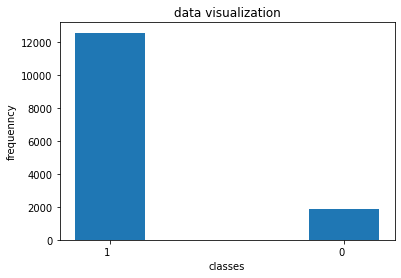

In [ ]:
# visualize data
lstcount = [dataset["Ligitimacy"].value_counts()[1],dataset["Ligitimacy"].value_counts()[0]]
show_data_balanceing("data visualization",['1','0'],lstcount)

In [ ]:
#split the dataset into independent variables and target
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [ ]:
#remove ID coulmn
X.drop("ID",axis=1,inplace=True)

## 2.	Split the dataset into two for training (80%) and test (20%)

In [ ]:
#split dataset into trianing and testing with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify= y)

In [ ]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

In [ ]:
#scalling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## 	Use RF and Adaboost classification models separately using training dataset.

In [ ]:
#Random Forest Classifier
#We got best performance at max_depth= 23
RFclf = RandomForestClassifier(max_depth=23, random_state=0)
RFclf.fit(X_train, y_train)


 

RandomForestClassifier(max_depth=23, random_state=0)

Testing accuracy of Random Forest: 99.58577839143942%
Classification Report for RF
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       379
           1       1.00      1.00      1.00      2518

    accuracy                           1.00      2897
   macro avg       1.00      0.99      0.99      2897
weighted avg       1.00      1.00      1.00      2897

[[ 368   11]
 [   1 2517]]


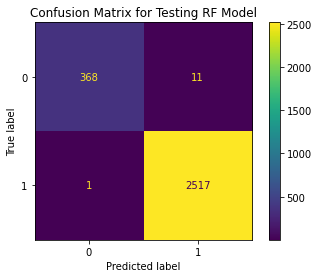

In [ ]:
# Testing accuracy of RF
ypredRF_testing =RFclf.predict(X_test)
RandomForest_test_acc = accuracy_score(y_test, ypredRF_testing)
print(f'Testing accuracy of Random Forest: {RandomForest_test_acc*100}%')
print('Classification Report for RF')
print(classification_report(y_test, ypredRF_testing))
getConfusionMatrix(RFclf,X_test,y_test,"Confusion Matrix for Testing RF Model")
 

In [ ]:
#AdaBoost Classifier
#We got best performance at n_estimators=2380
Adaclf = AdaBoostClassifier(n_estimators=2380, random_state=0)
Adaclf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=2380, random_state=0)

Testing accuracy of Adaboost: 99.58577839143942%
Classification Report for Adaboost
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       379
           1       1.00      1.00      1.00      2518

    accuracy                           1.00      2897
   macro avg       1.00      0.99      0.99      2897
weighted avg       1.00      1.00      1.00      2897

[[ 369   10]
 [   2 2516]]


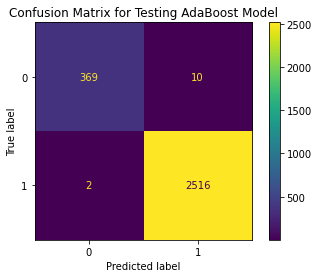

In [ ]:
# testing accuracy of Adaboost
ypredAda_testing=Adaclf.predict(X_test)
adaBoost_test_acc = accuracy_score(y_test, ypredAda_testing)
print(f'Testing accuracy of Adaboost: {adaBoost_test_acc*100}%')
print('Classification Report for Adaboost')
print(classification_report(y_test, ypredAda_testing))
getConfusionMatrix(Adaclf,X_test,y_test,"Confusion Matrix for Testing AdaBoost Model")

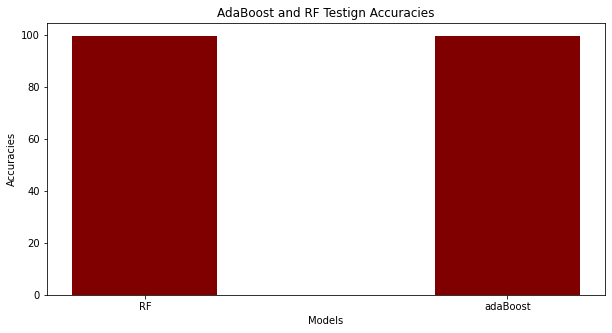

In [ ]:
data = { 'RF':RandomForest_test_acc*100,'adaBoost':adaBoost_test_acc*100}
models = list(data.keys())
accuracies = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, accuracies, color ='maroon',width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("AdaBoost and RF Testign Accuracies")
plt.show()


 

##Create GAN Model

In [ ]:
!pip install keras
!pip install tensorflow
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-kpkm_ves
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-kpkm_ves
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=180247 sha256=8a5076117abefba2c80ed7ee1d51c4c03b37f84fc24cade879c7f144824d06e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-o_6nept8/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
from keras.layers import Activation, Dropout, Flatten, Dense, Input, LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import concatenate, multiply
from keras.layers import Embedding
from keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
import tensorflow
import keras
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow_docs.vis import embed
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#some initialization for GAN Model
batch_size = 64
num_channels = 11 # number of our features
num_classes = 2 #number of classes
latent_dim = 128 

In [ ]:
np.random.seed(42)

In [ ]:
labels = keras.utils.to_categorical(y_train, 2)

# Create tf.data.Dataset.
dataset = tf.data.Dataset.from_tensor_slices((X_train ,labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

print(f"Shape of training set: {X_train.shape}")
print(f"Shape of training set: {labels.shape}")

Shape of training set: (11587, 11)
Shape of training set: (11587, 2)


In [ ]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)

130 13


In [ ]:

# the discriminator.
discriminator = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape =   discriminator_in_channels),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.2),

        layers.Dense(1 ,activation="sigmoid")

   
    ],
    name="discriminator",
)


# Create the generator.
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels)),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(momentum=0.8),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(momentum=0.8),
        layers.Dense(11)
    ],
    name="generator",
)

In [ ]:
#Creating a ConditionalGAN model 
class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(ConditionalGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ConditionalGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        real_Tasks, one_hot_labels = data
        real_Tasks = tf.cast(real_Tasks,tf.float32)

        print(one_hot_labels.dtype)
        print(real_Tasks.dtype)
        # Add dummy dimensions to the labels so that they can be concatenated with
        # the Tasks. This is for the discriminator.

        Task_one_hot_labels = one_hot_labels[:, :, None, None]
        Task_one_hot_labels = tf.reshape(
            Task_one_hot_labels, (-1,  num_classes)
        )

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = tf.shape(real_Tasks)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Decode the noise (guided by labels) to fake Tasks.
        generated_Tasks = self.generator(random_vector_labels)

        # Combine them with real Tasks. Note that we are concatenating the labels
        # with these Tasks here.
        
        fake_Task_and_labels = tf.concat([generated_Tasks, Task_one_hot_labels], -1)

        real_Task_and_labels = tf.concat([real_Tasks, Task_one_hot_labels], -1)

        combined_Tasks = tf.concat(
            [fake_Task_and_labels, real_Task_and_labels], axis=0
        )

        # Assemble labels discriminating real from fake Tasks.
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )

        # Train the discriminator.
        with tf.GradientTape() as tape:

            predictions = self.discriminator(combined_Tasks)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Assemble labels that say "all real Tasks".
        misleading_labels = tf.zeros((batch_size, 1))
        
        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            fake_Tasks = self.generator(random_vector_labels)
            fake_Task_and_labels = tf.concat([fake_Tasks, Task_one_hot_labels], -1)

            predictions = self.discriminator(fake_Task_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }



In [ ]:
#Training the Conditional GAN

cond_gan = ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

cond_gan.fit(dataset, epochs=50)

Epoch 1/50
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
<dtype: 'float32'>
182/182 [==============================] - 2s 5ms/step - g_loss: 0.8082 - d_loss: 0.7817
Epoch 2/50
182/182 [==============================] - 1s 6ms/step - g_loss: 0.9933 - d_loss: 0.6768
Epoch 3/50
182/182 [==============================] - 1s 7ms/step - g_loss: 0.9738 - d_loss: 0.5997
Epoch 4/50
182/182 [==============================] - 1s 5ms/step - g_loss: 0.9448 - d_loss: 0.6202
Epoch 5/50
182/182 [==============================] - 1s 5ms/step - g_loss: 0.9045 - d_loss: 0.6515
Epoch 6/50
182/182 [==============================] - 1s 5ms/step - g_loss: 0.9024 - d_loss: 0.6145
Epoch 7/50
182/182 [==============================] - 1s 5ms/step - g_loss: 0.8998 - d_loss: 0.6496
Epoch 8/50
182/182 [==============================] - 1s 5ms/step - g_loss: 0.9356 - d_loss: 0.5730
Epoch 9/50
182/182 [==============================] - 1s 5ms/step - g_loss: 0.8971 - d_loss: 0.6822
Epoch 10/50
182/182 [===

In [ ]:
#We first extract the trained generator from our Conditiona GAN.
trained_gen = cond_gan.generator

# Choose the number of intermediate functions that would be generated in
# between the interpolation + 2 (start and last functions).
num_interpolation = 1000  # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = tf.random.normal(shape=(1, latent_dim))
interpolation_noise = tf.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = tf.reshape(interpolation_noise, (num_interpolation, latent_dim))


def interpolate_class(Class):
    # Convert the start and end labels to one-hot encoded vectors.
    first_label = keras.utils.to_categorical([Class]*num_interpolation, num_classes)
    noise_and_labels = tf.concat([interpolation_noise, first_label], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake

class_ = 1
fake_Functions = interpolate_class(class_)

In [ ]:
X_test_conbination_withoutCascade = np.concatenate((fake_Functions,X_test) , axis = 0)
y_test_conbination_withoutCascade =  np.concatenate((y_test["Ligitimacy"].values,np.zeros(num_interpolation)) , axis = 0).astype("int")
print(fake_Functions)
print(len(fake_Functions))
print(len(X_test))
print(len(X_test_conbination_withoutCascade))
print(len(y_test_conbination_withoutCascade))
print(X_test_conbination_withoutCascade)
print(y_test_conbination_withoutCascade)

[[ 0.44655564 -0.00882204 -0.75256646 ... -0.17957763 -0.97088337
   0.39706036]
 [ 0.44655564 -0.00882204 -0.75256646 ... -0.17957763 -0.97088337
   0.39706036]
 [ 0.44655564 -0.00882204 -0.75256646 ... -0.17957763 -0.97088337
   0.39706036]
 ...
 [ 0.91407704 -0.15935181 -1.1258625  ... -1.3009357  -1.0168563
   0.87498784]
 [ 0.91407704 -0.15935181 -1.1258625  ... -1.3009357  -1.0168563
   0.87498784]
 [ 0.91407704 -0.15935181 -1.1258625  ... -1.3009357  -1.0168563
   0.87498784]]
1000
2897
3897
3897
[[ 0.44655564 -0.00882204 -0.75256646 ... -0.17957763 -0.97088337
   0.39706036]
 [ 0.44655564 -0.00882204 -0.75256646 ... -0.17957763 -0.97088337
   0.39706036]
 [ 0.44655564 -0.00882204 -0.75256646 ... -0.17957763 -0.97088337
   0.39706036]
 ...
 [ 0.26823112 -0.52147256  0.66666667 ... -0.77142857 -1.
   0.26820203]
 [ 0.69844978 -0.65032058 -1.         ... -0.91428571 -1.
   0.70720804]
 [ 0.06094813  0.72749145  0.33333333 ...  0.88571429  1.
   0.0731824 ]]
[1 0 0 ... 0 0 0]


# **Use previous RF and Adaboost classification models separately to predict our using training + GAN generated dataset before cascading .**

##RF

Testing accuracy of Random Forest of our result data that combined the original data plut the generated data before cascading: 63.61303566846293%
Classification Report for RF of our result data that combined the original data plut the generated data before cascading
              precision    recall  f1-score   support

           0       0.45      0.12      0.19      1379
           1       0.66      0.92      0.77      2518

    accuracy                           0.64      3897
   macro avg       0.55      0.52      0.48      3897
weighted avg       0.58      0.64      0.56      3897

[[ 165 1214]
 [ 204 2314]]


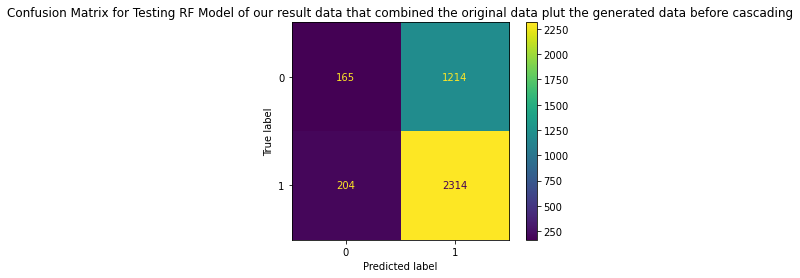

In [ ]:
 # RF Testing accuracy of our result data that combined the original data plut the generated data before cascading
ypredRF_testing_conbination_withoutCascade =RFclf.predict(X_test_conbination_withoutCascade)
RandomForest_test_acc_conbination_withoutCascade = accuracy_score(y_test_conbination_withoutCascade, ypredRF_testing_conbination_withoutCascade)
print(f'Testing accuracy of Random Forest of our result data that combined the original data plut the generated data before cascading: {RandomForest_test_acc_conbination_withoutCascade*100}%')
print('Classification Report for RF of our result data that combined the original data plut the generated data before cascading')
print(classification_report(y_test_conbination_withoutCascade, ypredRF_testing_conbination_withoutCascade))
getConfusionMatrix(RFclf,X_test_conbination_withoutCascade,y_test_conbination_withoutCascade,"Confusion Matrix for Testing RF Model of our result data that combined the original data plut the generated data before cascading")
 

##AdaBoost

Testing accuracy of Adaboost of our result data that combined the original data plut the generated data before cascading: 63.81832178598922%
Classification Report for Adaboost of our result data that combined the original data plut the generated data before cascading
              precision    recall  f1-score   support

           0       0.46      0.12      0.19      1379
           1       0.66      0.92      0.77      2518

    accuracy                           0.64      3897
   macro avg       0.56      0.52      0.48      3897
weighted avg       0.59      0.64      0.56      3897

[[ 170 1209]
 [ 201 2317]]


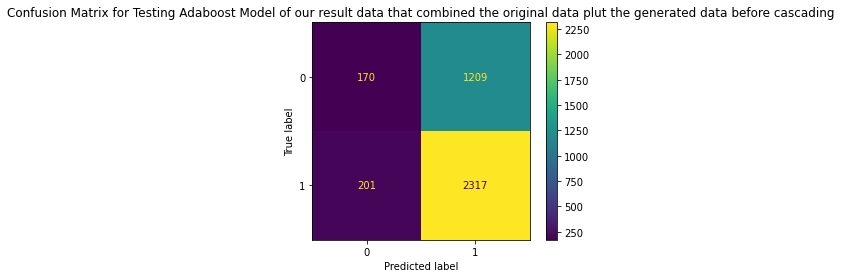

In [ ]:
# Adaboost Testing accuracy of our result data that combined the original data plut the generated data before cascading
ypredAda_testing_conbination_withoutCascade =Adaclf.predict(X_test_conbination_withoutCascade)
Ada_test_acc_conbination_withoutCascade = accuracy_score(y_test_conbination_withoutCascade, ypredAda_testing_conbination_withoutCascade)
print(f'Testing accuracy of Adaboost of our result data that combined the original data plut the generated data before cascading: {Ada_test_acc_conbination_withoutCascade*100}%')
print('Classification Report for Adaboost of our result data that combined the original data plut the generated data before cascading')
print(classification_report(y_test_conbination_withoutCascade, ypredAda_testing_conbination_withoutCascade))
getConfusionMatrix(Adaclf,X_test_conbination_withoutCascade,y_test_conbination_withoutCascade,"Confusion Matrix for Testing Adaboost Model of our result data that combined the original data plut the generated data before cascading")
 

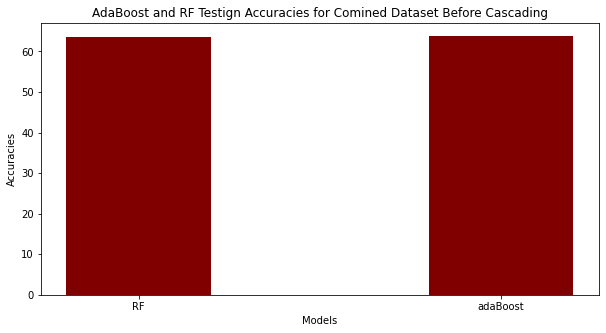

In [ ]:
data = { 'RF':RandomForest_test_acc_conbination_withoutCascade*100,'adaBoost':Ada_test_acc_conbination_withoutCascade*100}
models = list(data.keys())
accuracies = list(data.values())  
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(models, accuracies, color ='maroon',width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("AdaBoost and RF Testign Accuracies for Comined Dataset Before Cascading")
plt.show()


##**Cascading Process to Enhance Testing Results**

In [ ]:
y_test_conbination_withoutCascade
# Count occurrence of element '0' in numpy array
count_0 = (y_test_conbination_withoutCascade == 0).sum()
print(count_0)
# Count occurrence of element '1' in numpy array
count_1 = (y_test_conbination_withoutCascade == 1).sum()
print(count_1)

1379
2518


In [ ]:
#prepare our data to the discriminator
y_one_hot = keras.utils.to_categorical(y_test_conbination_withoutCascade, 2)
data_for_discriminator = tf.concat([X_test_conbination_withoutCascade, y_one_hot], axis=1 )
print(len(data_for_discriminator))
#run the discrimintaor as first level classifier
discriminator_pred = cond_gan.discriminator.predict(data_for_discriminator)
#convert the output to labels of 0 and 1
discriminator_pred = np.round(discriminator_pred) 
data_index_that_predicted_from_discriminator = np.where(discriminator_pred == 1)[0]
print(data_index_that_predicted_from_discriminator)
print(data_index_that_predicted_from_discriminator.shape)
X_test_conbination_Cascade = X_test_conbination_withoutCascade[data_index_that_predicted_from_discriminator]
print(X_test_conbination_Cascade.shape)
y_test_conbination_Cascade = np.ones(X_test_conbination_Cascade.shape[0]).astype("int")

3897
[   0    1    2 ... 3892 3894 3895]
(2417,)
(2417, 11)


# **Use previous RF and Adaboost classification models separately to predict our using training + GAN generated dataset after cascading .**

##**RF**

Testing accuracy of Random Forest of our result data that combined the original data plut the generated data After cascading: 94.86967314853125%
Classification Report for RF of our result data that combined the original data plut the generated data After cascading
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.97      2417

    accuracy                           0.95      2417
   macro avg       0.50      0.47      0.49      2417
weighted avg       1.00      0.95      0.97      2417

[[   0    0]
 [ 124 2293]]


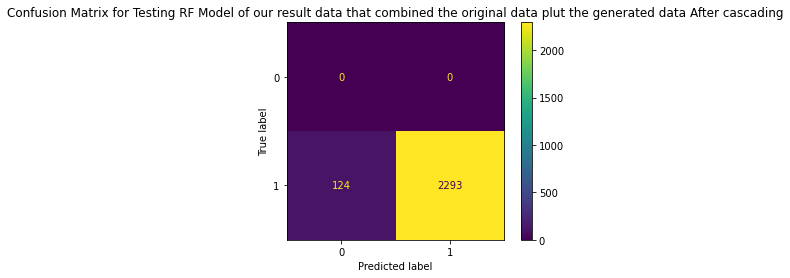

In [ ]:
 # RF Testing accuracy of our result data that combined the original data plut the generated data before cascading
ypredRF_testing_conbination_Cascade =RFclf.predict(X_test_conbination_Cascade)
RandomForest_test_acc_conbination_Cascade = accuracy_score(y_test_conbination_Cascade, ypredRF_testing_conbination_Cascade)
print(f'Testing accuracy of Random Forest of our result data that combined the original data plut the generated data After cascading: {RandomForest_test_acc_conbination_Cascade*100}%')
print('Classification Report for RF of our result data that combined the original data plut the generated data After cascading')
print(classification_report(y_test_conbination_Cascade, ypredRF_testing_conbination_Cascade))
getConfusionMatrix(RFclf,X_test_conbination_Cascade,y_test_conbination_Cascade,"Confusion Matrix for Testing RF Model of our result data that combined the original data plut the generated data After cascading")
 

##**AdaBoost**

Testing accuracy of Adaboost of our result data that combined the original data plut the generated data After cascading: 94.82829954489036%
Classification Report for Adaboost of our result data that combined the original data plut the generated data After cascading
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.97      2417

    accuracy                           0.95      2417
   macro avg       0.50      0.47      0.49      2417
weighted avg       1.00      0.95      0.97      2417

[[   0    0]
 [ 125 2292]]


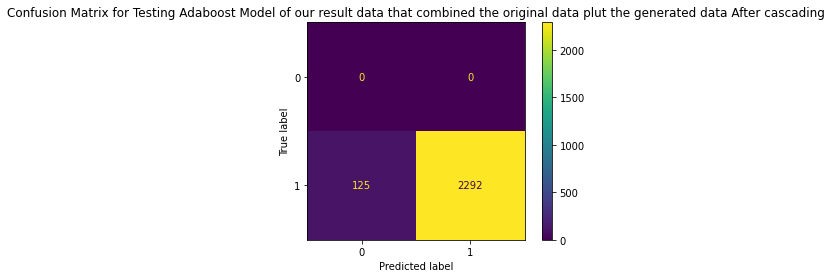

In [ ]:
# Adaboost Testing accuracy of our result data that combined the original data plut the generated data After cascading
ypredAda_testing_conbination_Cascade =Adaclf.predict(X_test_conbination_Cascade)
Ada_test_acc_conbination_Cascade = accuracy_score(y_test_conbination_Cascade, ypredAda_testing_conbination_Cascade)
print(f'Testing accuracy of Adaboost of our result data that combined the original data plut the generated data After cascading: {Ada_test_acc_conbination_Cascade*100}%')
print('Classification Report for Adaboost of our result data that combined the original data plut the generated data After cascading')
print(classification_report(y_test_conbination_Cascade, ypredAda_testing_conbination_Cascade))
getConfusionMatrix(Adaclf,X_test_conbination_Cascade,y_test_conbination_Cascade,
"Confusion Matrix for Testing Adaboost Model of our result data that combined the original data plut the generated data After cascading")
 

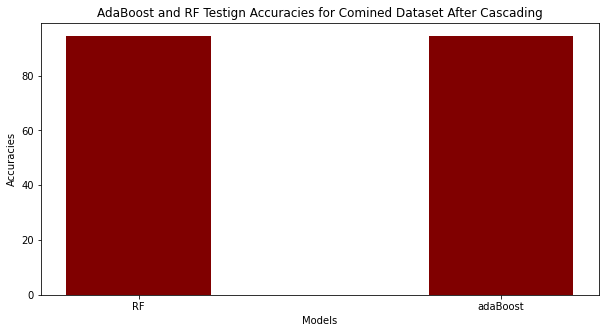

In [ ]:
data = { 'RF':RandomForest_test_acc_conbination_Cascade*100,'adaBoost':Ada_test_acc_conbination_Cascade*100}
models = list(data.keys())
accuracies = list(data.values())  
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(models, accuracies, color ='maroon',width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("AdaBoost and RF Testign Accuracies for Comined Dataset After Cascading")
plt.show()


#**References**
##For GAN Model
https://keras.io/examples/generative/conditional_gan/